In [1]:
import sys 
sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')
from ecog2mne_calc import ecog2mne_calc

import numpy as np
from calc_classification import calc_classification

#from jr.plot import pretty_gat, pretty_decod
from jr_tweaked.plot import pretty_gat, pretty_decod

import mne
from mne.decoding import GeneralizationAcrossTime




In [2]:
fname_ecog = '/neurospin/unicog/protocols/intracranial/Calculia/validdata/Calculia_subject_01/mat/data_s01_ecog.mat'


In [3]:
epoch_calc,info_calc = ecog2mne_calc(fname_ecog, 'data')



In [70]:
baseline = (-0.5, -0.05) #time for the baseline period
epoch_calc.apply_baseline(baseline)

downsampling = 4
epoch_calc.decimate(downsampling)

Applying baseline correction (mode: mean)
The measurement information indicates a low-pass frequency of 128 Hz. The decim=4 parameter will result in a sampling frequency of 16 Hz, which can cause aliasing artifacts.


/volatile/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: The measurement information indicates a low-pass frequency of 128 Hz. The decim=4 parameter will result in a sampling frequency of 16 Hz, which can cause aliasing artifacts.


<EpochsArray  |  n_events : 384 (all good), tmin : -0.5 (s), tmax : 4.875 (s), baseline : (-0.5, -0.05)>

In [71]:
epoch_number = epoch_calc[info_calc['isCalc'] == 1] 
info_number = info_calc[info_calc['isCalc'] == 1]
epoch_letter = epoch_calc[info_calc['isCalc'] == 0] 
info_letter = info_calc[info_calc['isCalc'] == 0]


operand1 = [int(v.astype('int')) for v in info_number.operand1.values]
operand2 = [int(v.astype('int')) for v in info_number.operand2.values]

info_number['operand1'] = operand1
info_number['operand2'] = operand2

/volatile/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/volatile/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
trainTimes = {'start': -0.1, 'stop': 4.5}
testTimes = {'start': -0.1, 'stop': 4.5}

params = {'trainTimes': trainTimes, 'testTimes': testTimes}

In [91]:
train_index = (info_number['operand1'] < 10) 
X_train = epoch_number[train_index]
y_train = np.array(info_number[train_index]['operand1'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
trainTimes = {'start': -0.1, 'stop': 4.5}
testTimes = {'start': -0.1, 'stop': 4.5}
mode = 'cross-validation'
params.update({'mode': mode})

In [92]:
gat_1, score_1, diagonal_1 = calc_classification(X_train, y_train, X_test, y_test, params)


[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.2s finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    6.0s finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.4s finished


Populating the interactive namespace from numpy and matplotlib


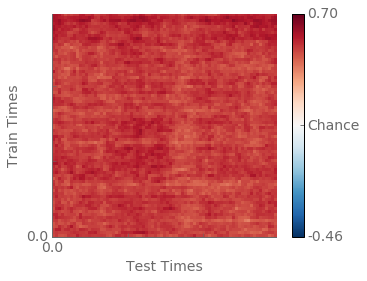

In [88]:
%pylab inline
pretty_gat(score_1, chance=.12)
plt.show()

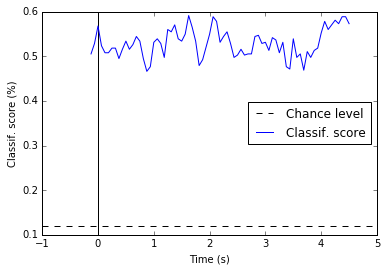

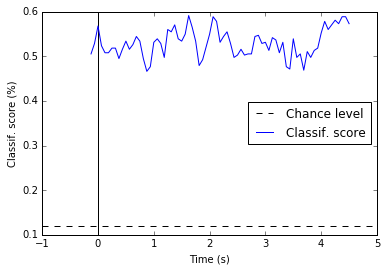

In [90]:
gat_1.plot_diagonal(chance = .12)

In [72]:
X_train = epoch_calc
y_train = np.array(info_calc['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
trainTimes = {'start': -0.1, 'stop': 4.5}
testTimes = {'start': -0.1, 'stop': 4.5}
mode = 'cross-validation'
params.update({'mode': mode})

In [73]:
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)


[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   15.7s finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   14.8s finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.5s finished


Populating the interactive namespace from numpy and matplotlib


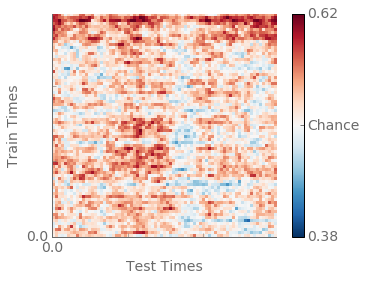

In [75]:
%pylab inline
pretty_gat(score, chance=.5)
plt.show()

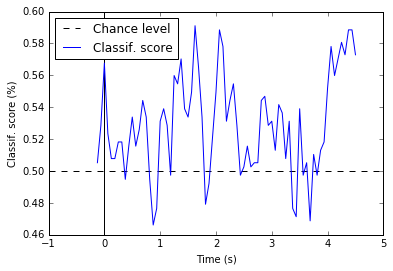

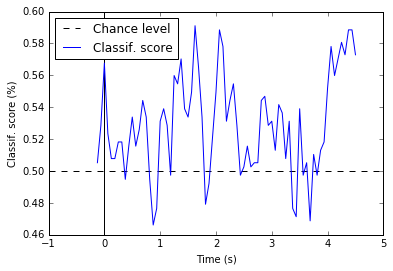

In [85]:
gat.plot_diagonal(chance = .5)

In [ ]:
info_calc_train['operand1'].map(lambda x: x[0])